##### **4 학습**
https://github.com/WegraLee/deep-learning-from-scratch

https://sdr1982.tistory.com/201#google_vignette


- 학습이란?
    - train dataset으로 부터 parameter의 최적값을 획득하는 과정
    - loss를 가장 작게 만드는 parameter를 찾는 것이 목표


##### **Data**

- Training Data와 Test Data를 나눠 학습과 실험을 수행.
- generalization : 훈련 데이터에 포함되어 있지 않은 test data도 잘 풀어내는가
- overfitting : 훈련데이터에 과적합된 상태. loss는 작게 나오나 test 데이터에 대한 결과가 좋지않음.

##### **Loss function (손실함수)**

- MSE (Mean Squared Error, 평균 제곱 오차)
- MAE (Mean Absolute Error, 평균 절대 오차)
- Cross Entropy Error, 교차 엔트로피 오차

**MSE (Mean Squared Error, 평균 제곱 오차)**

$$E = \frac{1}{2} \sum_{k} (y_k - t_k)^2$$

- $y_k$ : 신경망의 출력
- $t_k$ : 정답 label (정답 레이블만 1, 나머지는 0 으로 가도록 조정 = one-hot encoding)
- $k$ : 데이터의 dimension

In [ ]:
# 신경망이 2라고 출력
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# 신경망이 7이라고 출력
y_e = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

# 실제 정답 label도 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

import numpy as np
print(mean_squared_error(np.array(y), np.array(t)))
print(mean_squared_error(np.array(y_e), np.array(t)))

0.09750000000000003
0.5975


7이라고 (즉 틀린 정답)을 출력했을 때 MSE가 커진다. <br>
반대로 올바른 정답을 출력했을때는 MSE가 작아짐.

**CEE (Cross Entropy Error, 교차 엔트로피 오차)**

$$E = -\sum_{k} t_k \log y_k$$


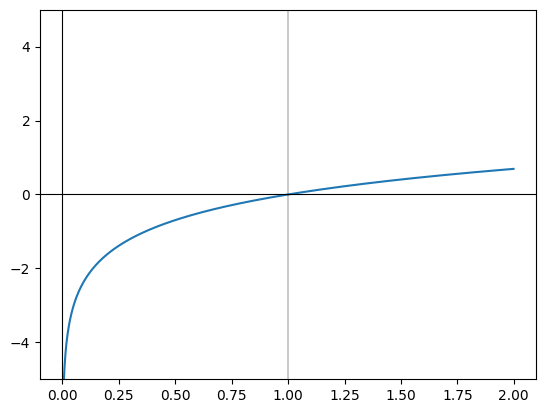

In [13]:
%matplotlib inline
import matplotlib.pylab as plt

x = np.arange(0.001, 2.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.ylim(-5.0, 5.0) # y축의 범위 지정

plt.axhline(0, color='black', linewidth=0.8) # x축 (y=0)
plt.axvline(0, color='black', linewidth=0.8) # y축 (x=0)
plt.axvline(1, color='black', linewidth=0.3) # y축 (x=1)
plt.show()

- $t_k$는 정답 레이블일때만 1이다. (정답이 아닌 label은 0)
    - 따라서 정답일때만 Error가 유효
- $y_k$ 값이 1에 가까울수록 Error가 작아지는 형태 (정답에 가까운 경우)


In [18]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 신경망의 출력이 3 (정답)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

# 신경망의 출력이 7 (오답)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


**MSE는 주로 회귀, CEE는 주로 분류 문제에서 활용**


**Loss 사용 이유?**

loss를 사용하면 정확도가 변하지 않을때도 꾸준히 매개변수 업데이트가 일어나고 loss도 계속해서 변화한다.


그러나 정확도를 지표로 사용시 매개변수를 업데이트해도 정확도가 달라지지않아 적절한 지표가 될수 없다.

+ Step function은 대부분의 기울기가 0이므로 지표로써 역할 못함

---

**Mini-Batch 학습**

전체 데이터셋 중 batch 크기만큼만 데이터를 무작위로 뽑아 그 데이터를 사용하여 학습

np.random.choice(60000, 10)  <br>
이런식으로 하지만 현업에서는 데이터셋을 shuffle시키고 순서대로 뽑는다. <br>
그리고 1 epoch후 다시 Shuffle하면 전체 데이터셋을 고르게 쓰게 된단

---

#### **수치미분**

**미분**

- 특정 순간의 변화량을 의미

- 코드 상으로 극한$(h->0)$을 완벽히 표현할 수 없으므로 Centered Difference(중앙 차분)방식을 사용하여 오차를 줄인다.
    - 중앙차분 : $(x+h)$와 $(x-h)$ 사이의 차분을 계산



**편미분**

$$f(x_0, x_1) = x_0^2 + x_1^2$$

- 변수가 여럿인 함수에 대한 미분. 어느 변수에 대한 미분이냐를 구별해야 함

수식으로 표현시 
$$\frac{\partial f}{\partial x_0}, \quad \frac{\partial f}{\partial x_1}$$

목표 변수만 미분하고, 다른변수는 값을 고정

**기울기 (Gradient)**

- 모든 변수의 편미분을 벡터로 정리한 것.

$$\left( \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1} \right)$$

In [3]:
import numpy as np

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    # for : 각 변수에 대해 미분 (=편미분)
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


_numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([6., 8.])

위 결과는 $f(x_0, x_1) = x_0^2 + x_1^2$ 에 대해 편미분한 결과임

/tmp/ipykernel_67303/4120156564.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


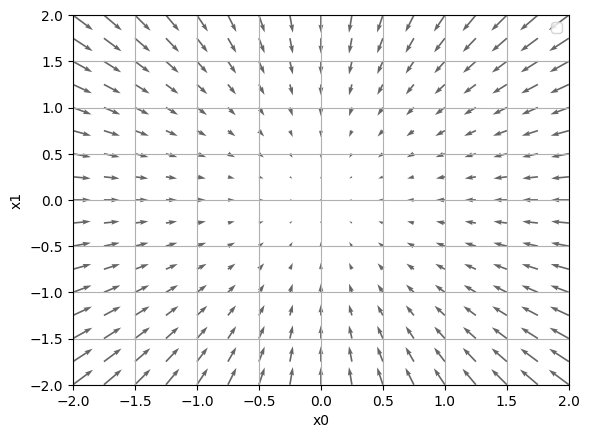

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pylab as plt

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

#접선의 방정식
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()
    
grad = numerical_gradient(function_2, np.array([X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

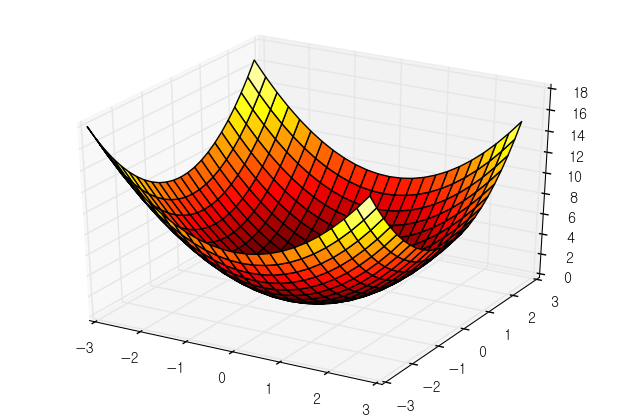

In [6]:
from IPython.display import Image, display
display(Image(filename='images/1.png', embed=True))

$f(x_0, x_1) = x_0^2 + x_1^2$ 에 대해 전체 영역에서 편미분한 결과이다.

모든 기울기가 (0,0) 방향을 가리키고, 거리가 멀수록 화살표의 크기(기울기의 크기)가 커지는 것을 알수 있음.

**기울기가 가리키는 곳 : 함수의 출력을 가장 줄이는 방향**

---

##### **Gradient Descent**

- 손실함수가 최소값이 될 때의 파라미터 값을 찾는 방법
- 함수의 극값에서는 기울기가 0이된다.

$$x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}$$
$$x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}$$

- $\eta$ : Learning rate를 의미함 (학습률)

즉, 현재 값 $x_0$에 기울기와 learning rate를 곱해준 값을 빼줌으로 써 점점 줄여나간다. (= 최소값을 찾는다)

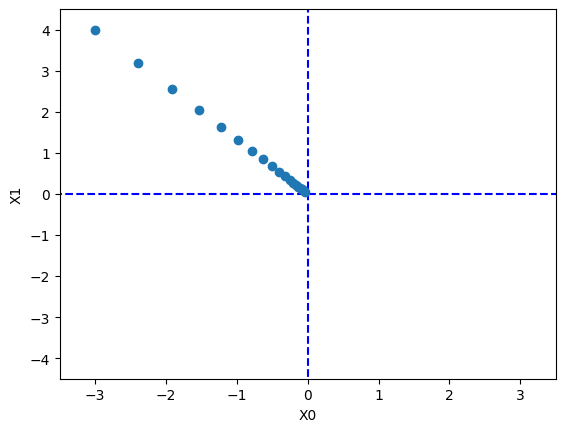

In [7]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

# 하이퍼파라미터
lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

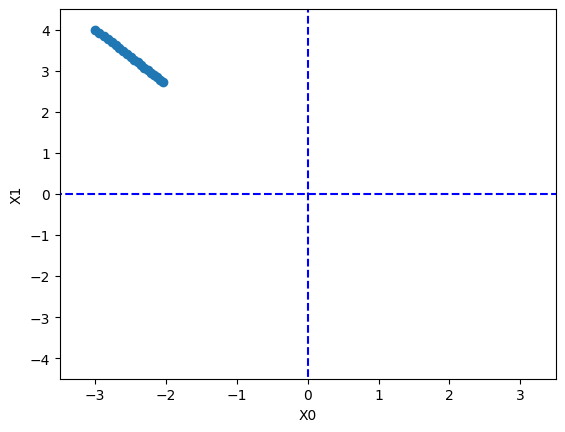

In [18]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

# 하이퍼파라미터
lr = 0.01
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

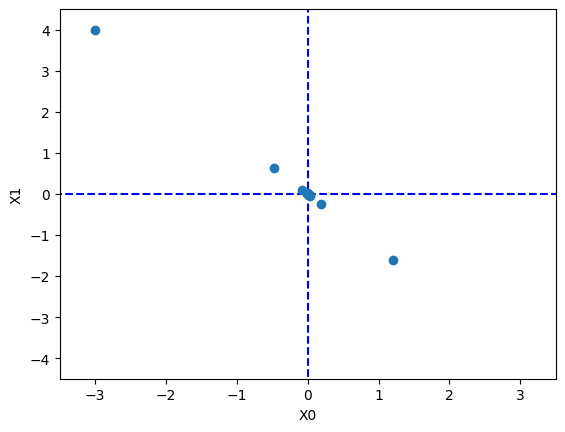

In [17]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

# 하이퍼파라미터
lr = 0.7
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

학습률이 너무크면 발산, 너무 작으면 거의 갱신되지 않는 위험이 있음.

학습률이나 step을 **hyper parameter**라고 하는데 사람이 설정해줘야하고 가장 잘 학습하는 값을 찾는 것이 중요하다

**SGD (Stochastic gradient descent)**

mini-batch만큼 무작위로 선택하여 골라낸 데이터 묶음으로 경사하강법을 하는 것

$$W = \begin{pmatrix} 
w_{11} & w_{12} & w_{13} \\ 
w_{21} & w_{22} & w_{23} 
\end{pmatrix}$$

$$\frac{\partial L}{\partial W} = \begin{pmatrix} 
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\ 
\frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}} 
\end{pmatrix}$$

**신경망에서의 기울기**

weight에 대해 편미분한 아래 행렬의 의미 <br>
: **각 weight가 Loss에 얼마나 영향을 미치는가**

---

##### **2층 신경망 클래스 구현하기**

In [28]:
from two_layer_net import TwoLayerNet # 만들어둔 2층 신경망을 import

#입력층 1, 은닉층(노드100개) 1, 출력층 1
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [31]:
import sys, os
# 부모 디렉터리를 경로에 추가
sys.path.append(os.pardir) 
# dataset 폴더 안의 mnist.py 파일에서 load_mnist 함수를 가져옴
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.7935333333333333, 0.7942
train acc, test acc | 0.8777, 0.8804
train acc, test acc | 0.8972666666666667, 0.9004
train acc, test acc | 0.9086666666666666, 0.9107
train acc, test acc | 0.9153, 0.9167
train acc, test acc | 0.9201833333333334, 0.9207
train acc, test acc | 0.92445, 0.9247
train acc, test acc | 0.92795, 0.9266
train acc, test acc | 0.9319, 0.931
train acc, test acc | 0.9346333333333333, 0.934
train acc, test acc | 0.9380666666666667, 0.9368
train acc, test acc | 0.9403833333333333, 0.9391
train acc, test acc | 0.94255, 0.9393
train acc, test acc | 0.9449833333333333, 0.9419
train acc, test acc | 0.9464, 0.9437
train acc, test acc | 0.9477666666666666, 0.9453


(0.0, 3.0)

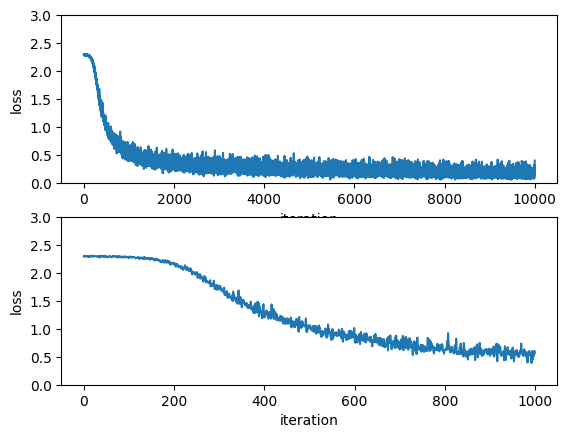

In [32]:
# 그림 4-11 손실 함수의 추이: 위쪽은 10,000회 반복까지의 추이, 아래쪽은 1,000회 반복까지의 추이
f, (ax1, ax2) = plt.subplots(2, 1)
x = np.array(range(iters_num))
ax1.plot(x, train_loss_list, label='loss')
ax1.set_xlabel("iteration")
ax1.set_ylabel("loss")
ax1.set_ylim(0, 3.0)
ax2.plot(x[:1000], train_loss_list[:1000], label='loss')
ax2.set_xlabel("iteration")
ax2.set_ylabel("loss")
ax2.set_ylim(0, 3.0)

100batch * 10000step = 1,000,000개의 데이터 학습


총 train data가 60000장이니까 16.6 epoch

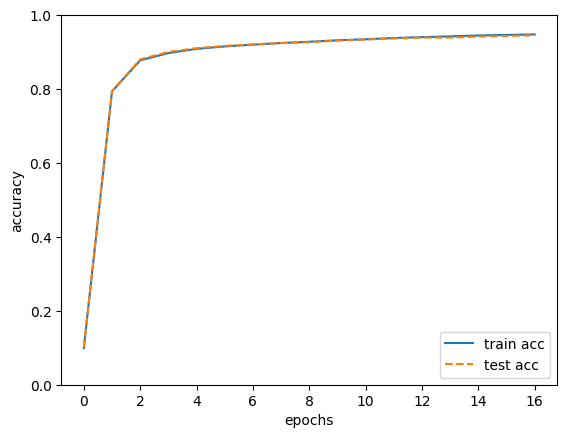

In [33]:
# 그림 4-12 훈련 데이터와 시험 데이터에 대한 정확도 추이
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()